 # **Logistic Regression and Gradient Descent in Neural Networks**

 Logistic regression is a simple form of a neural network that classifies data categorically. 
The goal of a good logistic regression algorithm is to reduce loss or optimize weights by improving the correctness of the output and this is achieved by a function called **Gradient Descent**. As seen in the course, a good way to evaluate the performance of the logistic regression algorithm is by achieving a minimal cost function (loss function) . Cost function quantifies the error between the predicted value and the expected values. Therefore, a logistic regression model must contain all these functions and we will code out these functions in python.

Your task is to build a logistic regression classifier to recognize image if it contains a cat or not. This project is your first step toward deep learning 



**Instructions:**

To build your NN, you need to follow the prinicipal steps:

- Implement a function for Initializing parameters( weights and bias)
- Implement a function for Calculating the loss function and its gradient
- Implement a function for the optimization algorithm applying the gradient descent method
- Gather all three functions above into a main model function, in the right order.

First, let’s import all the packages that we will be needing:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import numpy as np
import h5py
#from lr_utils import load_dataset
%matplotlib inline

Second, Download the dataset of images, and put it in data structure
Please, get the dataset of training and testing using these commands 


```
!wget -q https://raw.githubusercontent.com/mymehio/test/master/train_catvnoncat.h5
!wget -q https://raw.githubusercontent.com/mymehio/test/master/test_catvnoncat.h5
```

Then, define a function to load them properly into corresponding matrices 


In [ ]:
!wget -q https://raw.githubusercontent.com/mymehio/test/master/train_catvnoncat.h5
!wget -q https://raw.githubusercontent.com/mymehio/test/master/test_catvnoncat.h5

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set of images  
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test of images
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

**Description of the Dataset**
 
 
 Dataset files".h5"  contain:

- a training set of train images labeled as cat (y=1) or non-cat (y=0)
- a test set of test images labeled as cat or non-cat
- each image is of shape (num_pxas hieght , num_px as width, 3) where 3 is for the 3 channels (RGB). Thus, each image is square 



Now, Using the function load_dataset, you have to load matrices into variables: 

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
train_set_x_orig.shape


(209, 64, 64, 3)

**Exercise:** Show an image of your dataset, with its corresponding label

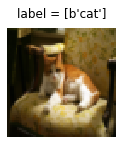

In [ ]:
# Example of a picture
index =7  # index of image to be shown 
# plot here 
# print the corresponding label

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(train_set_x_orig[index]) 
plt.title("label = "+ str(classes[train_set_y.transpose()[index]]))
ax.axis('off')
plt.show()

**Exercise:**
Find the values for these variables:
- m_train = ?  (number of training examples)
- m_test = ? (number of test examples)
- num_px = ? height or  width of an image
- Print them

In [ ]:
m_train = train_set_x_orig.shape[0] #
m_test = test_set_x_orig.shape[0] #
num_px = test_set_x_orig[0].shape[0] #


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


###Reshape images,, why ?

Remember that images are of shape (num_px, num_px, 3). Because we are going to uses full-connected 1D NN see figure, you have to reshape images into shape (num_px $*$ num_px $*$ 3, 1) which is numpy-array.
So that, after this reshaping, you get a dataset of numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

<img src=https://raw.githubusercontent.com/mymehio/test/master/LogReg_kiank.png width="550" height = 350>

**Exercise:**
 Reshape the training and test datasets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px $*$ num_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

In [ ]:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


### Dataset Normalization
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset.

In [ ]:
train_set_x = train_set_x_flatten / 255.    #why 
test_set_x = test_set_x_flatten / 255.

#**Building the parts of NN Architecture**

### **1) Implement the sigmoid Function**
First, You will begin by coding the sigmoid function by computing sigmoid( z) = 1/1+exp(-z), Where z = wx+b . Use np.exp().

In [ ]:
def sigmoid(z):
    s= 1/(1+np.exp(-z))
    return s

In [ ]:
print ("sigmoid([1, 2]) = " + str(sigmoid(np.array([1,2]))))

sigmoid([1, 2]) = [0.73105858 0.88079708]


### **2) Initialize the model parameters**
Now, you will continue by initializing the model parameters. The model parameters are the weights (w) and bias (b) with x as the input feature.

 w — initialized vector of shape (dim, 1)
 b — initialized scalar (corresponds to the bias)

In [ ]:
def initialize_with_zeros(dim):
     w = np.zeros((dim, 1))
     b = 0
     return w,b

In [ ]:
dim = 2  # if dim=2 so 2 weights et 1 bias
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### **3) Implement forward and backward propagation for learning the parameters**

This step is to implement the function called propagate() that learns the parameters w, b, and find y from x by computing the loss function (forward) and its gradient (backward).

**Hints:**

###Forward Propagation:

- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$



**Tips:**

```
Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
```



In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    y_hat = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = -1 / m*(np.sum(Y * np.log(y_hat) + (1-Y) * np.log(1-y_hat) ))   # compute cost
   
    # BACKWARD PROPAGATION (TO FIND GRAD)  derivative of weights and bias
    dw = 1/m*(np.dot(X, ((y_hat-Y).T)))
    db = 1/m*(np.sum(y_hat-Y))
  
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


### **4) Optimization**

- You have initialized your parameters.
- You are also able to compute a loss function and its gradient
- Now, you want to update repeatly the parameters using gradient descent .


**Exercise:** 

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the loss function $J$. 

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.


Tips: 



```
Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
  
    You basically need to write down two steps and iterate through them:
        1) Calculate the loss and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
```



In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    losses = []
    for i in range(num_iterations):
        grads, loss = propagate(w, b, X, Y)    # which function calculates the loss an grads ? 
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update learning rules 
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            losses.append(loss)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("loss after iteration %i: %f" %(i, loss))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, losses

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Exercise:**

The previous function will output the learned w and b. 

Which means that you have already a learned model, and it's able to use w and b to predict the labels for a dataset X as input.  
Implement the predict() function. There are two steps to computing predictions:

- Calculate $\hat{Y} = A = \sigma(w^T X + b)$

- Convert the entries of $A$ into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

**Tips:**


```
Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
```



In [ ]:
def predict(w, b, X):
    m = X.shape[1] # m becomes the num of entries after reshape

    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) +b)

    for i in range(A.shape[1]):  #A the numbers of image
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0][i] = 1 if A[0][i]>0.5 else 0

    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
print(w.shape)
print(X.shape)

(2, 1)
(2, 3)


You have already done: 

- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
- computing the loss function and its gradient
- updating the parameters using gradient descent
 - Use the learned (w,b) to predict the labels for a given set of examples
Now Let's merge all together

## **5) Putting it all together to form a model**
Now that you have our sigmoid function, loss function, and gradient descent, we will then combine everything into one single model and use this model to predict whether an image is a cat or non-cat


**Exercise:** Implement the model function. Use the following notation:

- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()

**Tips:**

```
Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
```



In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    #print('shape of weights', w.shape)
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Call the function on the real data (train_set_x, train_set_y, test_set_x, test_set_y) to train your model.
itrerations = 2000

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)


loss after iteration 0: 0.693147
loss after iteration 100: 0.823921
loss after iteration 200: 0.418944
loss after iteration 300: 0.617350
loss after iteration 400: 0.522116
loss after iteration 500: 0.387709
loss after iteration 600: 0.236254
loss after iteration 700: 0.154222
loss after iteration 800: 0.135328
loss after iteration 900: 0.124971
loss after iteration 1000: 0.116478
loss after iteration 1100: 0.109193
loss after iteration 1200: 0.102804
loss after iteration 1300: 0.097130
loss after iteration 1400: 0.092043
loss after iteration 1500: 0.087453
loss after iteration 1600: 0.083286
loss after iteration 1700: 0.079487
loss after iteration 1800: 0.076007
loss after iteration 1900: 0.072809
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


* Try different: learning rate values, number of iterations, and see the results onf test accuracy

In [ ]:
train_set_x.shape

(12288, 209)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


y = 1, you predicted that it is a "cat" picture.


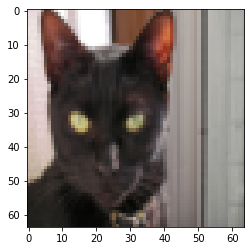

In [ ]:
index = 9
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[np.int(d['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Let's plot the curve of loss function during the training 

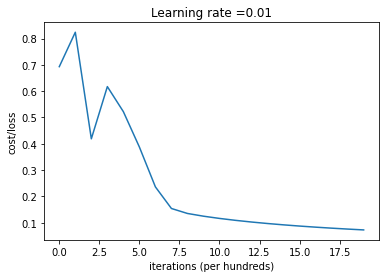

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost/loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## **Further Exercises**

**Reminder:** In order for Gradient Descent to work, you must choose the learning rate wisely. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

* Let's compare the learning curve of your model with several choices of learning rates.
* Feel free also to try different values than the three we have initialized the learning_rates variable to contain, and see what happens.

* Please put your comments and interpretations after seeing the results  

loss after iteration 0: 0.693147
loss after iteration 100: 0.823921
loss after iteration 200: 0.418944
loss after iteration 300: 0.617350
loss after iteration 400: 0.522116
loss after iteration 500: 0.387709
loss after iteration 600: 0.236254
loss after iteration 700: 0.154222
loss after iteration 800: 0.135328
loss after iteration 900: 0.124971
loss after iteration 1000: 0.116478
loss after iteration 1100: 0.109193
loss after iteration 1200: 0.102804
loss after iteration 1300: 0.097130
loss after iteration 1400: 0.092043
loss after iteration 1500: 0.087453
loss after iteration 1600: 0.083286
loss after iteration 1700: 0.079487
loss after iteration 1800: 0.076007
loss after iteration 1900: 0.072809
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %
loss after iteration 0: 0.693147
loss after iteration 100: 0.591289
loss after iteration 200: 0.555796
loss after iteration 300: 0.528977
loss after iteration 400: 0.506881
loss after iteration 500: 0.487880
loss after iteration 600: 

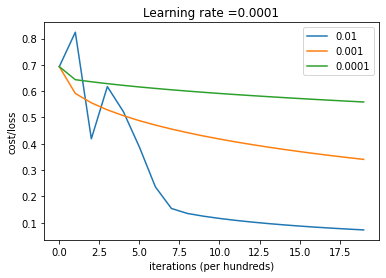

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
  d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = i, print_cost = True)
  costs = np.squeeze(d['costs'])
  plt.plot(costs, label=i)

plt.ylabel('cost/loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend()
plt.show()

**Interpretation:**

- The biggest learning rate give the smallest error, the smaller one might found a local minimum that is not the best

The smallest learning rate 0.01 give the best performance in both computing complexity and accuracy area. Indeed, it seems to converge faster to a better performance than the larger learning rate. 
The way I see it, the loss function has probably many local minimum in which smaller learning rate converged toward.  

## **Test with your own image** 
1. Add your image to this Notebook's directory, in the "images" folder (take or download one)
2. choose your image's name in the following code
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)

(64, 64, 3)
(12288, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 1.0, 'you predicted that it is a "non-cat" picture.')

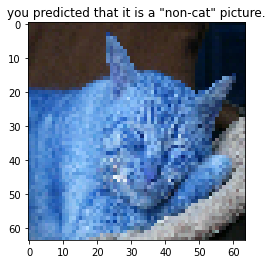

In [ ]:
import cv2    #use opencv library to read and resize the image
my_image = "cat.jpeg"   

fname =  my_image
image = cv2.imread(fname,cv2.IMREAD_UNCHANGED)
#print(image)
#normalize and resize your original image
your_image = image/255 #normalize it
#print(your_image.shape)
your_image = cv2.resize(your_image, (64, 64)) #resize it
#display it
print(your_image.shape)
#flatten the image
image_flatten = your_image.reshape(-1, 1)
print(image_flatten.shape)
my_predicted_image = predict(d["w"], d["b"], image_flatten)
plt.imshow(your_image)
plt.title("you predicted that it is a \"" + classes[np.int(my_predicted_image)].decode("utf-8") + "\" picture.")

**Bibliography:**

http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/


# Exercise 
## Build Your Model using Keras library and tensorflow as backend

[Keras is an open-source software library](https://keras.io/getting_started/) that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.

Up until version 2.3, Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit, Theano, and PlaidML


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

### Load Data from hdf file
- 

1.   Use the same method of above
2. List all keys available in the loaded data set 

```
train_dataset = h5py.File('train_catvnoncat.h5', "r")
list(train_dataset.keys())
```
3.   Use a a percent of train dataset to validate with during the training, as

```

from sklearn.model_selection import train_test_split
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = ? # your train set of images  
train_set_y_orig = ? # your train set labels


X_train,X_val,Y_train,Y_val = train_test_split(train_set_x_orig,train_set_y_orig,test_size = 0.1)
```  

4.   Visualize a histogram of how many images are cat and non-cat, use seaborn library

```
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(list(train_set_y_orig),palette='twilight')
```
4.  Build the model using keras API 

```
model = models.Sequential()
model.add(layers.Flatten(input_shape = ?)) # this layer is to put 3D image into a 1D vector

model.add(layers.Dense(?,activation='relu'))# dense layer is full connected layer
model.add(layers.Dense(?,activation='sigmoid')) # why sigmoid ?

- Please provide your own model architecture ( N layers) and justify your choice.
- Please provide your interpretation of sigmoid choice.
```
5. To train the model, use *compile function* it needs to specify the loss function and an optimizer (to learn more about it in the next sessions). Then Use *fit function*  to start the learning process by the model 


```
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train, Y_train,validation_data = (X_val, Y_val),epochs=100, batch_size=16)

adam*: is an advanced version of gradient descent, you can use it as is for now. 

Why using binary_crossentropy ?
```
6. Plot Loss and accuracy curves of training and validation dataset 


```
acc = modelk.history.history['accuracy']
val_acc = modelk.history.history['val_accuracy']
loss = modelk.history.history['loss']
val_loss = modelk.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

## then plot the loss curves 
```





In [ ]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
list(train_dataset.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set of images  
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

X_train,X_val,Y_train,Y_val = train_test_split(train_set_x_orig,train_set_y_orig,test_size = 0.1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


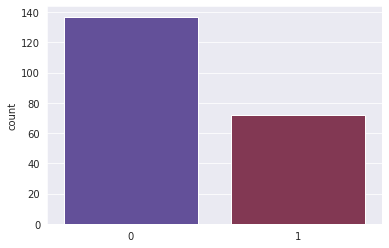

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(list(train_set_y_orig),palette='twilight')

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = (64,64,3))) # this layer is to put 3D image into a 1D vector

model.add(layers.Dense(512, activation='relu'))# dense layer is full connected layer
model.add(layers.Dense(1,activation='sigmoid')) # why sigmoid ?

Why sigmoid ?

The sigmoid function must be used in the output layer when we build a binary classifier in which the output is interpreted as a class label depending on the probability value of input returned by the function.
It returns 0.5 for the input 0. The value 0.5 is known as the threshold value which can decide that a given input belongs to what type of two classes

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# imporved version of backpropagation
model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16)

Epoch 1/100
12/12 [==============================] - 2s 68ms/step - loss: 1415.9305 - accuracy: 0.5638 - val_loss: 164.7451 - val_accuracy: 0.8095
Epoch 2/100
12/12 [==============================] - 0s 36ms/step - loss: 295.8469 - accuracy: 0.5213 - val_loss: 142.6272 - val_accuracy: 0.8095
Epoch 3/100
12/12 [==============================] - 0s 38ms/step - loss: 244.0610 - accuracy: 0.5957 - val_loss: 310.3402 - val_accuracy: 0.8095
Epoch 4/100
12/12 [==============================] - 0s 37ms/step - loss: 244.5323 - accuracy: 0.5904 - val_loss: 170.3692 - val_accuracy: 0.8095
Epoch 5/100
12/12 [==============================] - 0s 39ms/step - loss: 118.5877 - accuracy: 0.6330 - val_loss: 78.2082 - val_accuracy: 0.4762
Epoch 6/100
12/12 [==============================] - 0s 38ms/step - loss: 37.1701 - accuracy: 0.7766 - val_loss: 36.6563 - val_accuracy: 0.7619
Epoch 7/100
12/12 [==============================] - 0s 37ms/step - loss: 32.7894 - accuracy: 0.7553 - val_loss: 45.6272 - val

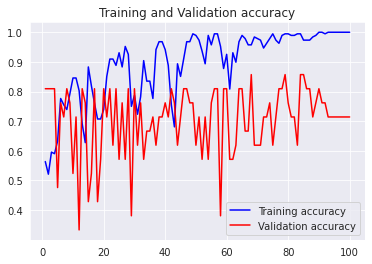

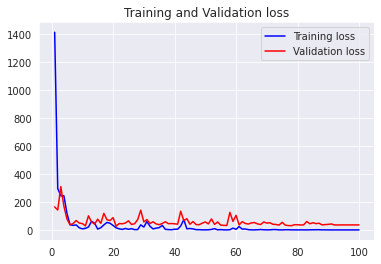

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## How tesing your model

1. Load your test dataset


```
file = 'test_catvnoncat.h5'
test_dataset = h5py.File(file, 'r')
group_key = list(test_dataset.keys())


test_set_x_orig = ? # your test of images
test_set_y_orig = ? # your test set labels
```

2. prdict the test data with the trained model


```
predk = modelk.predict(test_set_x_orig)
predictions= []
for i in predk:
    if i>=0.5:
        predictions.append(1)
    else:
        predictions.append(0)
```

3. Evaluate the accuracy and the loss using testing dataset


```
loss, acc = modelk.evaluate(test_set_x_orig, test_set_y_orig,
                            batch_size=32)
print('Test score:', loss)
print('Test accuracy:', acc)
```


4. Test with your own image
```
As explained before, follow the same steps please
```




In [ ]:
file = 'test_catvnoncat.h5'
test_dataset = h5py.File(file, 'r')
group_key = list(test_dataset.keys())

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test of images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

In [ ]:
predk = model.predict(test_set_x_orig)
predictions= []

for i in predk:
    if i>=0.5:
        predictions.append(1)
    else:
        predictions.append(0)

2/2 [==============================] - 0s 13ms/step


In [ ]:
loss, acc = model.evaluate(test_set_x_orig, test_set_y_orig, batch_size=32)

print('Test score:', loss)
print('Test accuracy:', acc)

2/2 [==============================] - 0s 14ms/step - loss: 59.3329 - accuracy: 0.7400
Test score: 59.332923889160156
Test accuracy: 0.7400000095367432


Please, Use your own notebook to implement and complete your work, then please email me the following elements:

* a copy pdf of your notebook
* share me your notebook via my address mymehio@gmail.com
* deadline: 24/11 11:59 PM

In [ ]:
from sklearn.metrics import confusion_matrix

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(test_set_y_orig, predictions , normalize='pred')
result

array([[0.6       , 0.16666667],
       [0.4       , 0.83333333]])

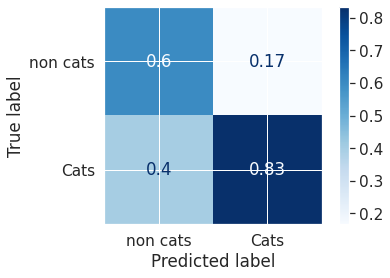

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
labels = ["non cats", "Cats"]
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 2 

In [58]:
model2 = models.Sequential()
model2.add(layers.Flatten(input_shape = (64,64,3)))
model2.add(layers.Dense(512, activation='relu', input_dim=3))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# imporved version of backpropagation
model2.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=150, batch_size=16)

Epoch 1/100
12/12 [==============================] - 1s 57ms/step - loss: 971.2570 - accuracy: 0.5372 - val_loss: 463.7212 - val_accuracy: 0.8095
Epoch 2/100
12/12 [==============================] - 1s 43ms/step - loss: 327.9438 - accuracy: 0.5585 - val_loss: 15.8469 - val_accuracy: 0.6190
Epoch 3/100
12/12 [==============================] - 1s 47ms/step - loss: 100.5421 - accuracy: 0.5798 - val_loss: 28.1832 - val_accuracy: 0.8095
Epoch 4/100
12/12 [==============================] - 1s 45ms/step - loss: 57.2125 - accuracy: 0.6064 - val_loss: 29.5730 - val_accuracy: 0.4762
Epoch 5/100
12/12 [==============================] - 1s 45ms/step - loss: 26.2593 - accuracy: 0.6755 - val_loss: 24.9359 - val_accuracy: 0.7619
Epoch 6/100
12/12 [==============================] - 1s 45ms/step - loss: 71.0250 - accuracy: 0.6649 - val_loss: 55.1980 - val_accuracy: 0.8095
Epoch 7/100
12/12 [==============================] - 1s 45ms/step - loss: 114.0630 - accuracy: 0.4947 - val_loss: 38.1867 - val_accu

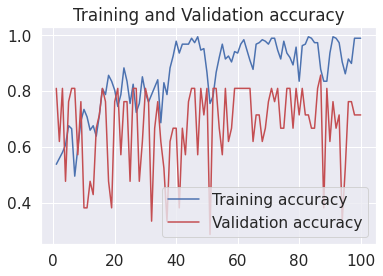

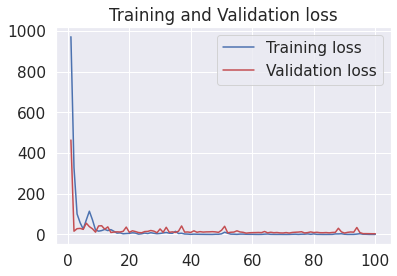

In [59]:
acc = model2.history.history['accuracy']
val_acc = model2.history.history['val_accuracy']
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [62]:
file = 'test_catvnoncat.h5'
test_dataset = h5py.File(file, 'r')
group_key = list(test_dataset.keys())

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test of images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

predk2 = model2.predict(test_set_x_orig)
predictions2 = []

for i in predk2:
    if i>=0.5:
        predictions2.append(1)
    else:
        predictions2.append(0)

loss2, acc2 = model2.evaluate(test_set_x_orig, test_set_y_orig, batch_size=32)

print('Test score:', loss2)
print('Test accuracy:', acc2)

2/2 [==============================] - 0s 23ms/step - loss: 3.7316 - accuracy: 0.7400
Test score: 3.7316482067108154
Test accuracy: 0.7400000095367432


## Model 3

In [70]:
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape = (64,64,3)))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# imporved version of backpropagation
model3.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=150, batch_size=16)

Epoch 1/150
12/12 [==============================] - 1s 55ms/step - loss: 898.6710 - accuracy: 0.5532 - val_loss: 240.5065 - val_accuracy: 0.1905
Epoch 2/150
12/12 [==============================] - 1s 48ms/step - loss: 285.5584 - accuracy: 0.5160 - val_loss: 269.6687 - val_accuracy: 0.8095
Epoch 3/150
12/12 [==============================] - 1s 53ms/step - loss: 211.5724 - accuracy: 0.4574 - val_loss: 38.9730 - val_accuracy: 0.8095
Epoch 4/150
12/12 [==============================] - 1s 42ms/step - loss: 164.0170 - accuracy: 0.5053 - val_loss: 247.6740 - val_accuracy: 0.3333
Epoch 5/150
12/12 [==============================] - 0s 40ms/step - loss: 45.2748 - accuracy: 0.6649 - val_loss: 57.6588 - val_accuracy: 0.4286
Epoch 6/150
12/12 [==============================] - 0s 41ms/step - loss: 34.2393 - accuracy: 0.6064 - val_loss: 66.1452 - val_accuracy: 0.3810
Epoch 7/150
12/12 [==============================] - 0s 39ms/step - loss: 28.3734 - accuracy: 0.6489 - val_loss: 21.4675 - val_ac

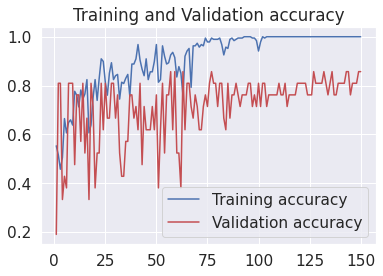

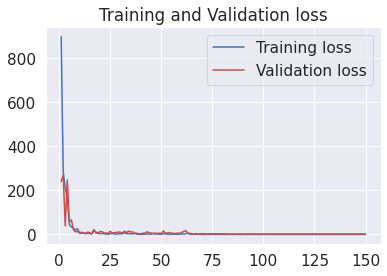

In [71]:
acc = model3.history.history['accuracy']
val_acc = model3.history.history['val_accuracy']
loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [72]:
file = 'test_catvnoncat.h5'
test_dataset = h5py.File(file, 'r')
group_key = list(test_dataset.keys())

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test of images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

predk3 = model3.predict(test_set_x_orig)
predictions3 = []

for i in predk3:
    if i>=0.5:
        predictions3.append(1)
    else:
        predictions3.append(0)

loss3, acc3 = model3.evaluate(test_set_x_orig, test_set_y_orig, batch_size=32)

print('Test score:', loss3)
print('Test accuracy:', acc3)

2/2 [==============================] - 0s 17ms/step - loss: 2.8638 - accuracy: 0.7000
Test score: 2.863821029663086
Test accuracy: 0.699999988079071


##VGG16

In [83]:
model4 = models.Sequential()
model4.add(layers.Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model4.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model4.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model4.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model4.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model4.add(layers.Flatten(name='flatten'))
model4.add(layers.Dense(256, activation='relu', name='fc1'))
model4.add(layers.Dense(128, activation='relu', name='fc2'))
model4.add(layers.Dense(1, activation='sigmoid', name='output'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# imporved version of backpropagation
model4.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, batch_size=16)


Epoch 1/50
12/12 [==============================] - 37s 3s/step - loss: 14.1490 - accuracy: 0.5426 - val_loss: 0.6879 - val_accuracy: 0.8095
Epoch 2/50
12/12 [==============================] - 36s 3s/step - loss: 0.6897 - accuracy: 0.6383 - val_loss: 0.6770 - val_accuracy: 0.8095
Epoch 3/50
12/12 [==============================] - 38s 3s/step - loss: 0.6827 - accuracy: 0.6383 - val_loss: 0.6540 - val_accuracy: 0.8095
Epoch 4/50
12/12 [==============================] - 35s 3s/step - loss: 0.6714 - accuracy: 0.6383 - val_loss: 0.6155 - val_accuracy: 0.8095
Epoch 5/50
12/12 [==============================] - 35s 3s/step - loss: 0.6851 - accuracy: 0.6383 - val_loss: 0.5960 - val_accuracy: 0.8095
Epoch 6/50
12/12 [==============================] - 35s 3s/step - loss: 0.6632 - accuracy: 0.6383 - val_loss: 0.6152 - val_accuracy: 0.8095
Epoch 7/50
12/12 [==============================] - 35s 3s/step - loss: 0.6615 - accuracy: 0.6383 - val_loss: 0.5974 - val_accuracy: 0.8095
Epoch 8/50
12/12 [=

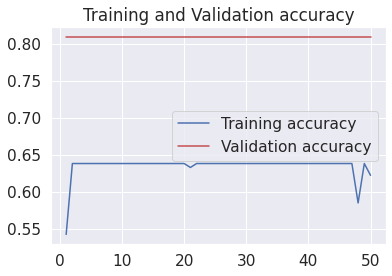

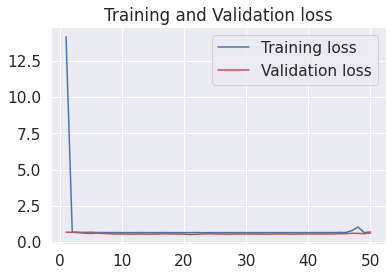

In [84]:
acc = model4.history.history['accuracy']
val_acc = model4.history.history['val_accuracy']
loss = model4.history.history['loss']
val_loss = model4.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [85]:
file = 'test_catvnoncat.h5'
test_dataset = h5py.File(file, 'r')
group_key = list(test_dataset.keys())

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test of images
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

predk4 = model4.predict(test_set_x_orig)
predictions4 = []

for i in predk4:
    if i>=0.5:
        predictions4.append(1)
    else:
        predictions4.append(0)

loss4, acc4 = model4.evaluate(test_set_x_orig, test_set_y_orig, batch_size=32)

print('Test score:', loss4)
print('Test accuracy:', acc4)

2/2 [==============================] - 2s 770ms/step - loss: 0.7378 - accuracy: 0.3400
Test score: 0.7378196716308594
Test accuracy: 0.3400000035762787
